In [57]:
import numpy as np
import pandas as pd

# Класс с реализацией линейной регрессии

In [58]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        n, k = X.shape

        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

    def r2_score(self, X, y):
        y_pred = self.predict(X)
        SSR = np.sum((y - y_pred) ** 2)
        SST = np.sum((y - np.mean(y)) ** 2)
        return 1 - (SSR / SST)

In [59]:
data = pd.read_csv('./california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [60]:
num_cols=data.columns[:-1].tolist()

target_col = 'median_house_value'

cols = num_cols + [target_col] 
cols  

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [61]:
data.isna().mean()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64

# Получаем (визуализируем) статистику по датасету

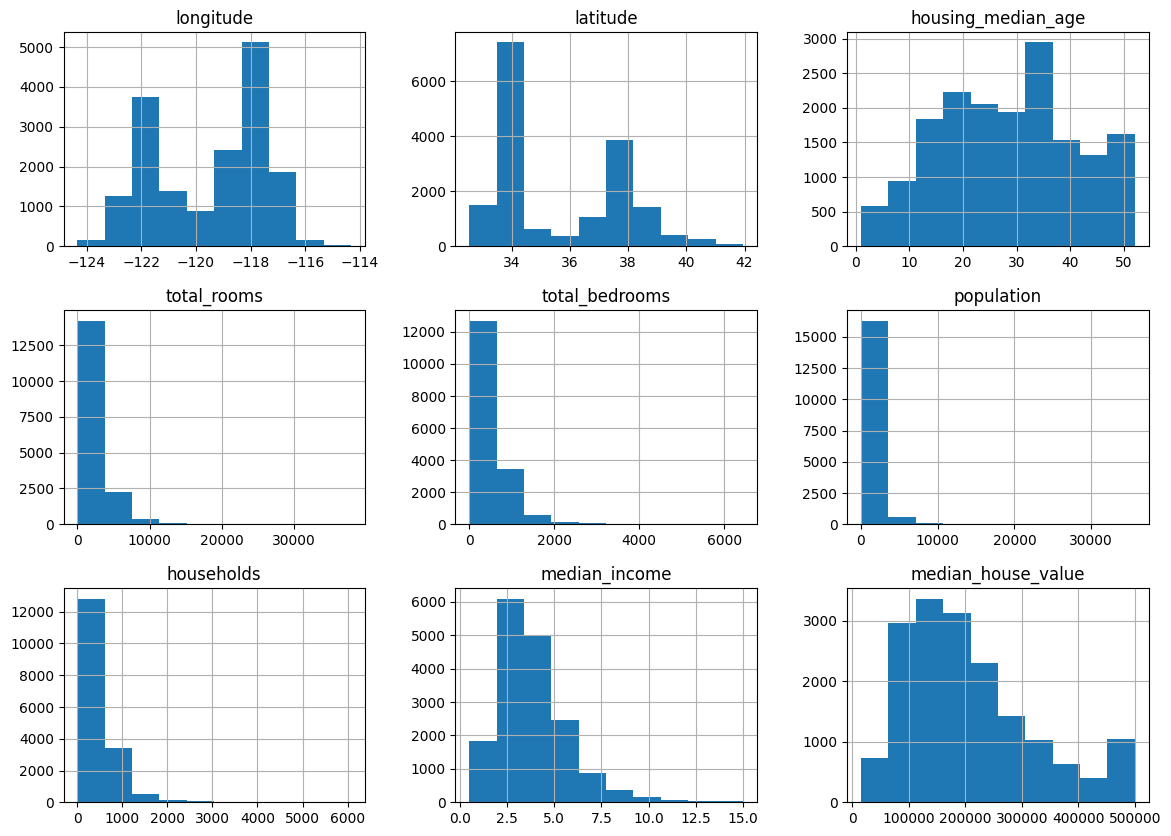

In [62]:
data.hist(column=cols, figsize=(14, 10))
None

In [63]:
data[num_cols].mean()

longitude             -119.562108
latitude                35.625225
housing_median_age      28.589353
total_rooms           2643.664412
total_bedrooms         539.410824
population            1429.573941
households             501.221941
median_income            3.883578
dtype: float64

In [64]:
data[num_cols].min()

longitude            -124.3500
latitude               32.5400
housing_median_age      1.0000
total_rooms             2.0000
total_bedrooms          1.0000
population              3.0000
households              1.0000
median_income           0.4999
dtype: float64

In [65]:
data[num_cols].max()

longitude              -114.3100
latitude                 41.9500
housing_median_age       52.0000
total_rooms           37937.0000
total_bedrooms         6445.0000
population            35682.0000
households             6082.0000
median_income            15.0001
dtype: float64

In [66]:
data[num_cols].std()

longitude                2.005166
latitude                 2.137340
housing_median_age      12.586937
total_rooms           2179.947071
total_bedrooms         421.499452
population            1147.852959
households             384.520841
median_income            1.908157
dtype: float64

# Масштабирование

In [67]:
X = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()

In [68]:
from sklearn.model_selection import train_test_split

In [71]:
def train_features(feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X[feature_names], data[target_col].values, test_size=0.2)
    model = MyLinearRegression()
    model.fit(X_train, y_train)
    score = model.r2_score(X_test, y_test)
    print(f"\nМодель с признаками: {', '.join(feature_names)}")
    print(f"Коэффициенты: {dict(zip(feature_names, model.get_weights().flatten()))}")
    print(f"R^2 score: {score}")

In [72]:
# Модель 1: первые три признака
train_features(num_cols[:3])

# Модель 2: первые пять признаков
train_features(num_cols[:5])

# Модель 3: все признаки
train_features(num_cols)


Модель с признаками: longitude, latitude, housing_median_age
Коэффициенты: {'longitude': np.float64(-144631.39545819757), 'latitude': np.float64(-151435.5669793681), 'housing_median_age': np.float64(-1446.0680377662336)}
R^2 score: 0.2321199943747666

Модель с признаками: longitude, latitude, housing_median_age, total_rooms, total_bedrooms
Коэффициенты: {'longitude': np.float64(-142561.02120881825), 'latitude': np.float64(-150187.58851405024), 'housing_median_age': np.float64(6138.173742081696), 'total_rooms': np.float64(83032.71355270591), 'total_bedrooms': np.float64(-69327.3291454719)}
R^2 score: 0.328695109124321

Модель с признаками: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income
Коэффициенты: {'longitude': np.float64(-87733.46508064512), 'latitude': np.float64(-92801.67298854633), 'housing_median_age': np.float64(14811.300865332723), 'total_rooms': np.float64(-18668.150560301998), 'total_bedrooms': np.float64(50254.706